# Classification spectrale non supervisée en Python : Extraction des membres terminaux
Objectifs :
1. Apprendre à classifier des données spectrales en utilisant l'extraction de membres,
2. Divergence de l'information spectrale et cartographie de l'angle spectral".

* authors: Bridget Hass
* contributors: Donal O'Leary
* packagesLibraries: numpy, gdal, matplotlib, matplotlib.pyplot
topics: hyperspectral-remote-sensing, HDF5, remote-sensing

dataProduct: NEON.DP1.30006, NEON.DP3.30006, NEON.DP1.30008
code1: https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/tutorials/Python/Hyperspectral/hyperspectral-classification/classification_endmember_extraction_py/classification_endmember_extraction_py.ipynb



Ce tutoriel présente un exemple de démixage spectral pour effectuer une classification non supervisée d'un fichier de données hyperspectrales SERC en utilisant le paquetage <a href="https://pysptools.sourceforge.io/index.html" target="_blank">PySpTools</a> pour effectuer une **extraction de membres**, tracer des **cartes d'abondance** des membres finaux spectraux et utiliser la **cartographie d'angle spectral** et la **divergence d'information spectrale** pour classer la tuile SERC.

<div id="ds-objectives" markdown="1">

## Objectifs
Après avoir terminé ce tutoriel, vous serez en mesure de :

* Classifier des données spectrales de télédétection.

### Installer les paquets Python

* **numpy**
* **gdal**
* **matplotlib**
* **matplotlib.pyplot**


### Download Data

This tutorial uses a 1km AOP Hyperspectral Reflectance 'tile' from the SERC site. <a href="https://ndownloader.figshare.com/files/25752665">
Download the spectral classification teaching data subset here</a>.

<a href="https://ndownloader.figshare.com/files/25752665" class="link--button link--arrow">
Télécharger le jeu de données</a>

</div>

In [ ]:
# https://drive.google.com/file/d/1vwwvHzD-bo1CQkPduKVqRIMHYbVK-6Eq/view?usp=sharing
import gdown
gdown.download(
        f"https://drive.google.com/uc?export=download&confirm=pbef&id=1vwwvHzD-bo1CQkPduKVqRIMHYbVK-6Eq",
        '/content/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5'
    )

Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=1vwwvHzD-bo1CQkPduKVqRIMHYbVK-6Eq
To: /content/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5
100%|██████████| 618M/618M [00:05<00:00, 120MB/s]


'/content/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5'

In [ ]:
!gdalinfo /content/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5

/bin/bash: line 1: gdalinfo: command not found


Ce tutoriel présente un exemple de démixage spectral pour effectuer une classification non supervisée d'un fichier de données hyperspectrales SERC en utilisant le paquetage <a href="https://pysptools.sourceforge.io/index.html" target="_blank">PySpTools</a> pour effectuer une **extraction de membres**, tracer des **cartes d'abondance** des membres finaux spectraux et utiliser la **cartographie d'angle spectral** et la **divergence d'information spectrale** pour classer la tuile SERC.  

## Installation

Pour exécuter ce notebook, les librairies Python suivantes doivent être installés.

Vous pouvez installer les paquets requis à partir de la ligne de commande `pip install pysptools scikit-learn cvxopt`.

ou si vous êtes déjà dans un Notebook Jupyter :  

1. PySpTools: Download <a href="https://pypi.python.org/pypi/pysptools" target="_blank">pysptools-0.14.2.tar.gz</a>.
2. Run the following code in a Notebook code cell.

In [ ]:
!pip install matplotlib==3.4.3
!pip install pysptools #==0.14.2
!pip install cvxopt watermark rasterio
%load_ext watermark
#!pip3 install h5py==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 48.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.4.3-cp310-cp310-linux_x86_64.whl size=10438978 sha256=1c0340fa34dcdbb5b150660f45da303685b1fbd32572afb0880f69b95dfc19f8
  Stored in directory: /root/.cache/pip/wheels/71/af/e4/d399b616d3e7ae88374c2ebab2d5d3ecf776a3590d4f5f768f
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 47.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysptools: filename=pysptools-0.15.0-py3-none-any.whl size=8133733 sha256=4a573f1c4df52407ecfe511e1832e4731fb45788cfc192fc0d60dacfb9930bb9
  Stored in directory: /root/.cache/pip/wheels/ea/08/3b/c045ea3722a5fef1f8698f060a17b59140235fef580fe4f1b5
Successfully built pysptools
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 98.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 100.9 MB/s eta 0:00:00


In [ ]:
%load_ext watermark

In [ ]:
%watermark -p h5py,pysptools

h5py     : 3.9.0
pysptools: 0.15.0



In [ ]:
import h5py
help(h5py)

Help on package h5py:

NAME
    h5py

DESCRIPTION
    This is the h5py package, a Python interface to the HDF5
    scientific data format.

PACKAGE CONTENTS
    _conv
    _errors
    _hl (package)
    _objects
    _proxy
    _selector
    defs
    h5
    h5a
    h5ac
    h5d
    h5ds
    h5f
    h5fd
    h5g
    h5i
    h5l
    h5o
    h5p
    h5pl
    h5py_warnings
    h5r
    h5s
    h5t
    h5z
    ipy_completer
    tests (package)
    utils
    version

SUBMODULES
    filters

FUNCTIONS
    check_enum_dtype(...)
        If the dtype represents an HDF5 enumerated type, returns the dictionary
        mapping string names to integer values.
        
        Returns None if the dtype does not represent an HDF5 enumerated type.
    
    check_opaque_dtype(...)
        Return True if the dtype given is tagged to be stored as HDF5 opaque data
    
    check_ref_dtype(...)
        If the dtype represents an HDF5 reference type, returns the reference
        class (either Reference or Regio

In [ ]:
h5py.File?

In [ ]:
import h5py
def list_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name)
with h5py.File('/content/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5') as f:
  f.visititems(list_dataset)

SERC/Reflectance/Metadata/Ancillary_Imagery/Aerosol_Optical_Depth
SERC/Reflectance/Metadata/Ancillary_Imagery/Aspect
SERC/Reflectance/Metadata/Ancillary_Imagery/Cast_Shadow
SERC/Reflectance/Metadata/Ancillary_Imagery/Dark_Dense_Vegetation_Classification
SERC/Reflectance/Metadata/Ancillary_Imagery/Data_Selection_Index
SERC/Reflectance/Metadata/Ancillary_Imagery/Haze_Cloud_Water_Map
SERC/Reflectance/Metadata/Ancillary_Imagery/Illumination_Factor
SERC/Reflectance/Metadata/Ancillary_Imagery/Path_Length
SERC/Reflectance/Metadata/Ancillary_Imagery/Sky_View_Factor
SERC/Reflectance/Metadata/Ancillary_Imagery/Slope
SERC/Reflectance/Metadata/Ancillary_Imagery/Smooth_Surface_Elevation
SERC/Reflectance/Metadata/Ancillary_Imagery/Visibility_Index_Map
SERC/Reflectance/Metadata/Ancillary_Imagery/Water_Vapor_Column
SERC/Reflectance/Metadata/Ancillary_Imagery/Weather_Quality_Indicator
SERC/Reflectance/Metadata/Coordinate_System/Coordinate_System_String
SERC/Reflectance/Metadata/Coordinate_System/EPSG C

Vous pouvez voir qu'il y a beaucoup d'informations stockées dans ce fichier reflectance hdf5. La plupart de ces informations sont des métadonnées (données sur les données de réflectance), par exemple, ce fichier stocke les paramètres d'entrée utilisés dans la correction atmosphérique. Pour cette leçon d'introduction, nous ne travaillerons qu'avec deux de ces jeux de données, les données de réflectance (cube hyperspectral) et les informations géospatiales correspondantes, stockées dans Metadata/Coordinate_System :

* SERC/Reflectance/Reflectance_Data
* SERC/Reflectance/Metadata/Coordinate_System/

Nous pouvons également afficher le nom, la forme et le type de chacun de ces ensembles de données à l'aide de la fonction ls_dataset définie ci-dessous, qui est également appelée avec la méthode visititems :

In [ ]:
#ls_dataset displays the name, shape, and type of datasets in hdf5 file
def ls_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(node)
with h5py.File('/content/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5') as f:
  f.visititems(ls_dataset)

<HDF5 dataset "Aerosol_Optical_Depth": shape (1000, 1000), type "<i2">
<HDF5 dataset "Aspect": shape (1000, 1000), type "<f4">
<HDF5 dataset "Cast_Shadow": shape (1000, 1000), type "|u1">
<HDF5 dataset "Dark_Dense_Vegetation_Classification": shape (1000, 1000), type "|u1">
<HDF5 dataset "Data_Selection_Index": shape (1000, 1000), type "<i4">
<HDF5 dataset "Haze_Cloud_Water_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Illumination_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Path_Length": shape (1000, 1000), type "<f4">
<HDF5 dataset "Sky_View_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Slope": shape (1000, 1000), type "<f4">
<HDF5 dataset "Smooth_Surface_Elevation": shape (1000, 1000), type "<f4">
<HDF5 dataset "Visibility_Index_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Water_Vapor_Column": shape (1000, 1000), type "<f4">
<HDF5 dataset "Weather_Quality_Indicator": shape (1000, 1000, 3), type "|u1">
<HDF5 dataset "Coordinate_System_String": shap

Les données hyperspectrales NEON contiennent environ 426 bandes spectrales et, lorsqu'on travaille avec des données en mosaïque, les dimensions spatiales sont de 1000 x 1000, où chaque pixel représente 1 mètre. Examinons maintenant les valeurs de longueur d'onde. Tout d'abord, nous allons extraire les informations sur les longueurs d'onde de la variable serc_refl que nous avons créée :

In [ ]:
import numpy as np
with h5py.File('/content/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5') as f:
  serc_refl = f['SERC']['Reflectance']
  print(serc_refl)
  serc_reflArray = serc_refl['Reflectance_Data']
  print(serc_reflArray)
  refl_shape = serc_reflArray.shape
  print('SERC Reflectance Data Dimensions:',refl_shape)
  #define the wavelengths variable
  wavelengths = serc_refl['Metadata']['Spectral_Data']['Wavelength']

  #View wavelength information and values
  print('wavelengths:',wavelengths)
  # Display min & max wavelengths
  print('min wavelength:', np.amin(wavelengths),'nm')
  print('max wavelength:', np.amax(wavelengths),'nm')
  #show the band widths between the first 2 bands and last 2 bands
  #show the band widths between the first 2 bands and last 2 bands
  print('band width between first 2 bands =',(wavelengths[1]-wavelengths[0]),'nm')
  print('band width between last 2 bands =',(wavelengths[-1]-wavelengths[-2]),'nm')

  serc_mapInfo = serc_refl['Metadata']['Coordinate_System']['Map_Info']
  print('SERC Map Info:',serc_mapInfo[()])

<HDF5 group "/SERC/Reflectance" (2 members)>
<HDF5 dataset "Reflectance_Data": shape (1000, 1000, 426), type "<i2">
SERC Reflectance Data Dimensions: (1000, 1000, 426)
wavelengths: <HDF5 dataset "Wavelength": shape (426,), type "<f4">
min wavelength: 383.5343 nm
max wavelength: 2511.8945 nm
band width between first 2 bands = 5.007904 nm
band width between last 2 bands = 5.0078125 nm
SERC Map Info: b'UTM,  1.000,  1.000,       368000.00,       4307000.0,       1.0000000,       1.0000000,  18,  North,  WGS-84,  units=Meters, 0'


Cette forme tridimensionnelle (1000,1000,426) correspond à (y,x,bandes), où (x,y) sont les dimensions de la matrice de réflectance en pixels. Les ensembles de données hyperspectrales sont souvent appelés "cubes" pour refléter cette forme tridimensionnelle.

Nous utiliserons également les fonctions suivantes définies par l'utilisateur :

* **`read_neon_reflh5`** : fonction pour lire le fichier de données hyperspectrales NEON AOP (au format hdf5)
**`clean_neon_refl_data`** : fonction pour nettoyer les données hyperspectrales NEON, y compris l'application de la valeur d'ignorance des données et du facteur d'échelle de la réflectance, et la suppression des bandes de vapeur d'eau.
* **`plot_aop_refl`** : fonction permettant de tracer une bande de données hyperspectrales NEON à titre de référence

Une fois PySpTools installé, importez les paquets suivants.

In [ ]:
import h5py, os, copy
import matplotlib.pyplot as plt
import numpy as np
import pysptools.util as util
import pysptools.eea as eea #endmembers extraction algorithms
import pysptools.abundance_maps as amap
import pysptools.classification as cls
import pysptools.material_count as cnt

%matplotlib inline

#for clean output, to not print warnings, don't use when developing script
import warnings
warnings.filterwarnings('ignore')

Définir la fonction `read_neon_reflh5` pour lire le fichier h5, sans le nettoyer (en appliquant la valeur no-data et le facteur d'échelle) ; nous le ferons avec une fonction séparée qui supprime également les fenêtres de la mauvaise bande de vapeur d'eau.

In [ ]:
def read_neon_reflh5(refl_filename):
    """read in a NEON AOP reflectance hdf5 file and returns
    reflectance array, and metadata dictionary containing metadata
    (similar to envi header format)
    --------
    Parameters
        refl_filename -- full or relative path and name of reflectance hdf5 file
    --------
    Returns
    --------
    reflArray:
        array of reflectance values
    metadata:
        dictionary containing the following metadata (all strings):
            bad_band_window1: min and max wavelenths of first water vapor window (tuple)
            bad_band_window2: min and max wavelenths of second water vapor window (tuple)
            bands: # of bands (float)
            coordinate system string: coordinate system information (string)
            data ignore value: value corresponding to no data (float)
            interleave: 'BSQ' (string)
            reflectance scale factor: factor by which reflectance is scaled (float)
            wavelength: wavelength values (float)
            wavelength unit: 'm' (string)
            spatial extent: extent of tile [xMin, xMax, yMin, yMax], UTM meters
    --------
    Example Execution:
    --------
    sercRefl, sercMetadata = h5refl2array('NEON_D02_SERC_DP1_20160807_160559_reflectance.h5') """

    #Read in reflectance hdf5 file
    hdf5_file = h5py.File(refl_filename,'r')

    #Get the site name
    file_attrs_string = str(list(hdf5_file.items()))
    file_attrs_string_split = file_attrs_string.split("'")
    sitename = file_attrs_string_split[1]

    #Extract the reflectance & wavelength datasets
    refl = hdf5_file[sitename]['Reflectance']
    reflData = refl['Reflectance_Data']
    reflArray = refl['Reflectance_Data'][()]#.value

    #Create dictionary containing relevant metadata information
    metadata = {}
    metadata['map info'] = refl['Metadata']['Coordinate_System']['Map_Info'][()]#.value
    metadata['wavelength'] = refl['Metadata']['Spectral_Data']['Wavelength'][()]#.value

    #Extract no data value & set no data value to NaN
    metadata['data ignore value'] = float(reflData.attrs['Data_Ignore_Value'])
    metadata['reflectance scale factor'] = float(reflData.attrs['Scale_Factor'])
    metadata['interleave'] = reflData.attrs['Interleave']

    #Extract spatial extent from attributes
    metadata['spatial extent'] = reflData.attrs['Spatial_Extent_meters']

    #Extract bad band windows
    metadata['bad_band_window1'] = (refl.attrs['Band_Window_1_Nanometers'])
    metadata['bad_band_window2'] = (refl.attrs['Band_Window_2_Nanometers'])

    #Extract projection information
    #metadata['projection'] = refl['Metadata']['Coordinate_System']['Proj4'].value
    #metadata['epsg'] = int(refl['Metadata']['Coordinate_System']['EPSG Code'].value)

    #Extract map information: spatial extent & resolution (pixel size)
    #mapInfo = refl['Metadata']['Coordinate_System']['Map_Info'].value

    hdf5_file.close

    return reflArray, metadata


Now that the function is defined, we can call it to read in the sample reflectance file. Note that if your data is stored in a different location, you'll have to change the relative path, or include the absolute path.

In [ ]:
# You will need to download the example dataset using the link above,
# then update the filepath below to fit your local file structure
h5refl_filename = '/content/NEON_D02_SERC_DP3_368000_4306000_reflectance.h5'
data,metadata = read_neon_reflh5(h5refl_filename)

Let's take a quick look at the data contained in the `metadata` dictionary with a `for loop`:

In [ ]:
for key in sorted(metadata.keys()):
  print(key)

bad_band_window1
bad_band_window2
data ignore value
interleave
map info
reflectance scale factor
spatial extent
wavelength


    bad_band_window1
    bad_band_window2
    data ignore value
    epsg
    interleave
    map info
    projection
    reflectance scale factor
    spatial extent
    wavelength


Now we can define a function that cleans the reflectance cube. Note that this also removes the water vapor bands, stored in the metadata as `bad_band_window1` and `bad_band_window2`, as well as the last 10 bands, which tend to be noisy. It is important to remove these values before doing classification or other analysis.

In [ ]:
def clean_neon_refl_data(data,metadata):
    """Clean h5 reflectance data and metadata
    1. set data ignore value (-9999) to NaN
    2. apply reflectance scale factor (10000)
    3. remove bad bands (water vapor band windows + last 10 bands):
        Band_Window_1_Nanometers = 1340,1445
        Band_Window_2_Nanometers = 1790,1955
    """

    # use copy so original data and metadata doesn't change
    data_clean = data.copy().astype(float)
    metadata_clean = metadata.copy()

    #set data ignore value (-9999) to NaN:
    if metadata['data ignore value'] in data:
        nodata_ind = np.where(data_clean==metadata['data ignore value'])
        data_clean[nodata_ind]=np.nan

    #apply reflectance scale factor (divide by 10000)
    data_clean = data_clean/metadata['reflectance scale factor']

    #remove bad bands
    #1. define indices corresponding to min/max center wavelength for each bad band window:
    bb1_ind0 = np.max(np.where((np.asarray(metadata['wavelength'])<float(metadata['bad_band_window1'][0]))))
    bb1_ind1 = np.min(np.where((np.asarray(metadata['wavelength'])>float(metadata['bad_band_window1'][1]))))

    bb2_ind0 = np.max(np.where((np.asarray(metadata['wavelength'])<float(metadata['bad_band_window2'][0]))))
    bb2_ind1 = np.min(np.where((np.asarray(metadata['wavelength'])>float(metadata['bad_band_window2'][1]))))

    bb3_ind0 = len(metadata['wavelength'])-10

    #define valid band ranges from indices:
    vb1 = list(range(0,bb1_ind0));
    vb2 = list(range(bb1_ind1,bb2_ind0))
    vb3 = list(range(bb2_ind1,bb3_ind0))

    valid_band_range = [i for j in (range(0,bb1_ind0),
                                    range(bb1_ind1,bb2_ind0),
                                    range(bb2_ind1,bb3_ind0)) for i in j]

    data_clean = data_clean[:,:,vb1+vb2+vb3]

    metadata_clean['wavelength'] = [metadata['wavelength'][i] for i in valid_band_range]

    return data_clean, metadata_clean


Now, use this function to pre-process the data:

In [ ]:
data_clean,metadata_clean = clean_neon_refl_data(data,metadata)

Let's see the dimensions of the data before and after cleaning:

In [ ]:
print('Raw Data Dimensions:',data.shape)
print('Cleaned Data Dimensions:',data_clean.shape)

Raw Data Dimensions: (1000, 1000, 426)
Cleaned Data Dimensions: (1000, 1000, 360)


    Raw Data Dimensions: (1000, 1000, 426)
    Cleaned Data Dimensions: (1000, 1000, 360)


Note that we have retained 360 of the 426 bands. This still contains plenty of information, in your processing, you may wish to subset even further. Let's take a look at a histogram of the cleaned data:

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]

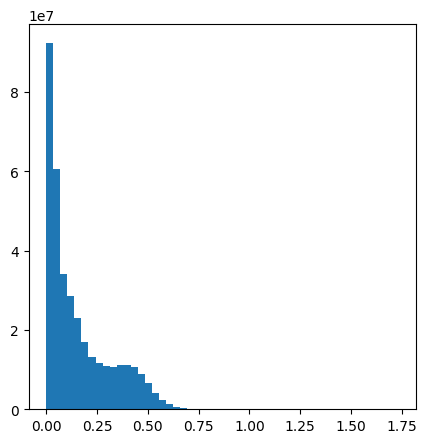

In [ ]:
plt.hist(data_clean[~np.isnan(data_clean)],50);

![ ](https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/py-figs/classification_endmember_extraction_py/output_17_0.png)

Lastly, let's take a look at the data using the function `plot_aop_refl` function:

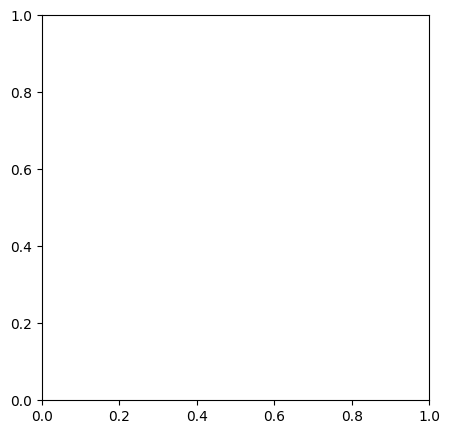

In [ ]:
def plot_aop_refl(band_array,
                  refl_extent,
                  colorlimit=(0,1),
                  ax=plt.gca(),
                  title='',
                  cbar ='on',
                  cmap_title='',
                  colormap='Greys'):
    plot = plt.imshow(band_array,extent=refl_extent,clim=colorlimit);
    if cbar == 'on':
        cbar = plt.colorbar(plot,aspect=40); plt.set_cmap(colormap);
        cbar.set_label(cmap_title,rotation=90,labelpad=20);
    plt.title(title); ax = plt.gca();
    ax.ticklabel_format(useOffset=False, style='plain');
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90);

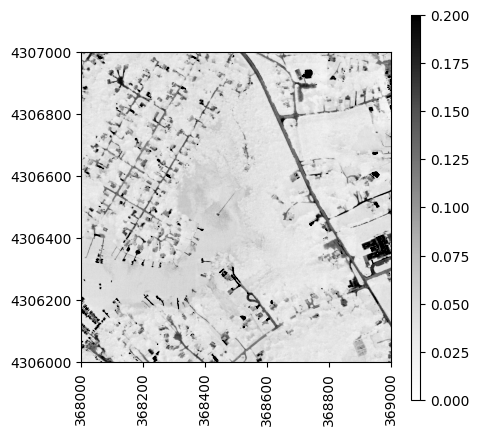

In [ ]:
plot_aop_refl(data_clean[:,:,1],
              metadata_clean['spatial extent'],
              (0,0.2))

![ ](https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/py-figs/classification_endmember_extraction_py/output_20_0.png)


## Classification non supervisée avec démixage spectral :
### Extraction des membres terminaux et cartographie de l'abondance

**Le démélange spectral** permet aux pixels d'être composés de fractions ou d'abondances de chaque classe.**Les membres terminaux spectraux** peuvent être considérés comme les spectres de base d'une image. Une fois ces spectres déterminés, le cube de l'image peut être "démélangé" en fonction de l'abondance fractionnelle de chaque matériau dans chaque pixel (Winter, 1999).

Le **Spectral Angle Mapper (SAM):** est une classification spectrale basée sur la physique qui utilise un angle n-D pour faire correspondre les pixels aux spectres de référence. L'algorithme détermine la similarité spectrale entre deux spectres en calculant l'angle entre les spectres et en les traitant comme des vecteurs dans un espace dont la dimensionnalité est égale au nombre de bandes. Cette technique, lorsqu'elle est utilisée sur des données de réflectance calibrées, est relativement insensible aux effets de l'illumination et de l'albédo. Les spectres d'extrémité utilisés par SAM dans cet exemple sont extraits de l'algorithme NFINDR. SAM compare l'angle entre le vecteur du spectre de l'élément final et chaque vecteur de pixel dans l'espace n-D. Les angles plus petits représentent des correspondances plus étroites avec le vecteur du spectre de l'élément final. Des angles plus petits représentent des correspondances plus étroites avec le spectre de référence. Les pixels plus éloignés que le seuil d'angle maximal spécifié en radians ne sont pas classés.

Pour en savoir plus sur le Spectral Angle Mapper, voir
<a href="http://www.harrisgeospatial.com/docs/SpectralAngleMapper.html" target="_blank">Harris Geospatial</a>.

**Divergence de l'information spectrale (SID):** est une méthode de classification spectrale qui utilise une mesure de divergence.

In [ ]:
#vd= cnt.vd.HfcVd(data_clean.reshape(data_clean.shape[0]*data_clean.shape[1],data_clean.shape[2]))

In [ ]:
#eea = data_clean
ee = eea.NFINDR()
U = ee.extract(data_clean,4,maxit=5,
               normalize=False,ATGP_init=True)

In order to display these endmember spectra, we need to define the endmember axes `dictionary`. Specifically we want to show the wavelength values on the x-axis. The `metadata['wavelength']` is a `list`, but the ee_axes requires a `float` data type, so we have to cast it to the right data type.

In [ ]:
type(metadata_clean['wavelength'])

list

    list

In [ ]:
ee_axes = {} # set ee_axes data type to dictionary
# cast wavelength values to float to apply to ee_axes for display purposes
ee_axes['wavelength'] = [float(i) for i in metadata_clean['wavelength']]
ee_axes['x']='Wavelength, nm' #x axis label
ee_axes['y']='Reflectance' #y axis label

Maintenant que les axes sont définis, nous pouvons afficher les endmembers spectraux avec `ee.display` :

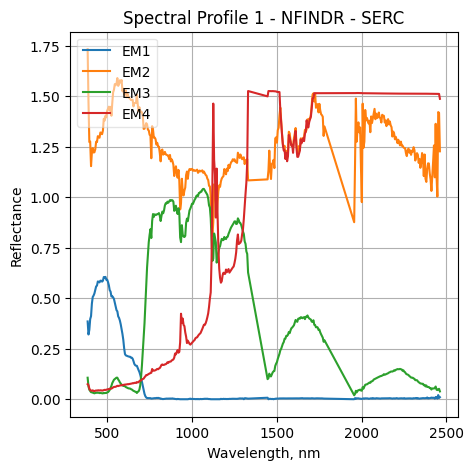

In [ ]:
ee.display(axes=ee_axes,suffix='SERC')

![ ](https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/py-figs/classification_endmember_extraction_py/output_28_0.png)


Maintenant que nous avons extrait les composantes spectrales, nous pouvons examiner les cartes d'abondance pour chaque composante. Celles-ci montrent les composantes fractionnaires de chacun des membres finaux. (cela prend 17 minutes)


```
am = amap.FCLS() #define am object using the amap
amaps = am.map(data_clean,U,normalize=False) #create abundance maps for the HSI cubems
```



In [ ]:
#np.save('amaps.npy', amaps)
!gdown https://drive.google.com/uc?id=1wDOCzDPYcaAvR7mcF6_ZryTWUF2GiyfQ
amaps = np.load('/content/amaps.npy')
am = amap.FCLS()
am.amap= amaps

Downloading...
From: https://drive.google.com/uc?id=1wDOCzDPYcaAvR7mcF6_ZryTWUF2GiyfQ
To: /content/amaps.npy
100% 16.0M/16.0M [00:00<00:00, 37.2MB/s]


In [ ]:
#am = amap.FCLS() #define am object using the amap
amaps = am.map(data_clean,U,normalize=False) #create abundance maps for the HSI cubems

In [ ]:
print(amaps.shape)

(1000, 1000, 4)


Use `am.display` to plot these abundance maps:

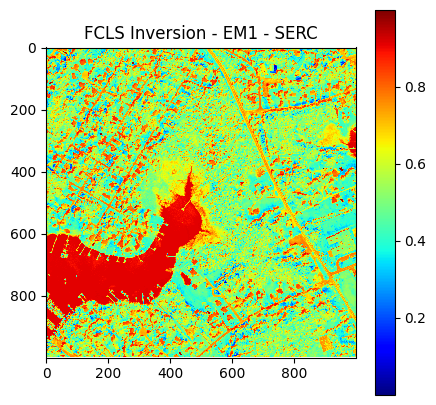

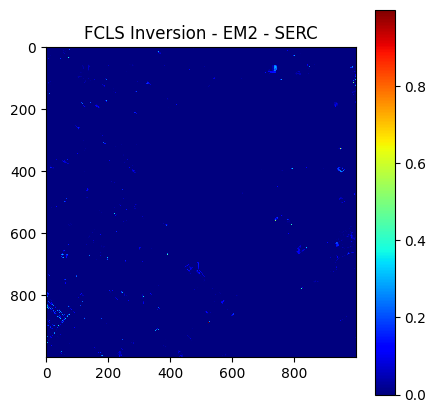

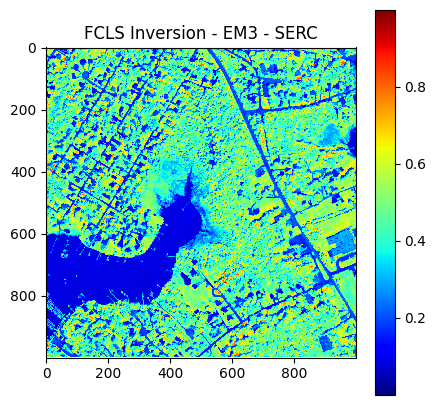

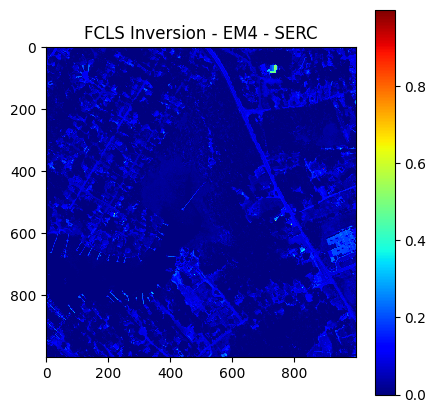

<Figure size 500x500 with 0 Axes>

In [ ]:
am.display(colorMap='jet',columns=4,suffix='SERC')

![ ](https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/py-figs/classification_endmember_extraction_py/output_32_0.png)


![ ](https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/py-figs/classification_endmember_extraction_py/output_32_1.png)


![ ](https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/py-figs/classification_endmember_extraction_py/output_32_2.png)


![ ](https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/py-figs/classification_endmember_extraction_py/output_32_3.png)


    <Figure size 432x288 with 0 Axes>


Print mean values of each abundance map to better estimate thresholds to use in the classification routines.

In [ ]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps[:,:,0]))
print('EM2:',np.mean(amaps[:,:,1]))
print('EM3:',np.mean(amaps[:,:,2]))
print('EM4:',np.mean(amaps[:,:,3]))

Abundance Map Mean Values:
EM1: 0.59177357
EM2: 0.00089541974
EM3: 0.3809638
EM4: 0.026367119


    Abundance Map Mean Values:
    EM1: 0.59177357
    EM2: 0.00089541974
    EM3: 0.3809638
    EM4: 0.026367119


You can also look at histogram of each abundance map:

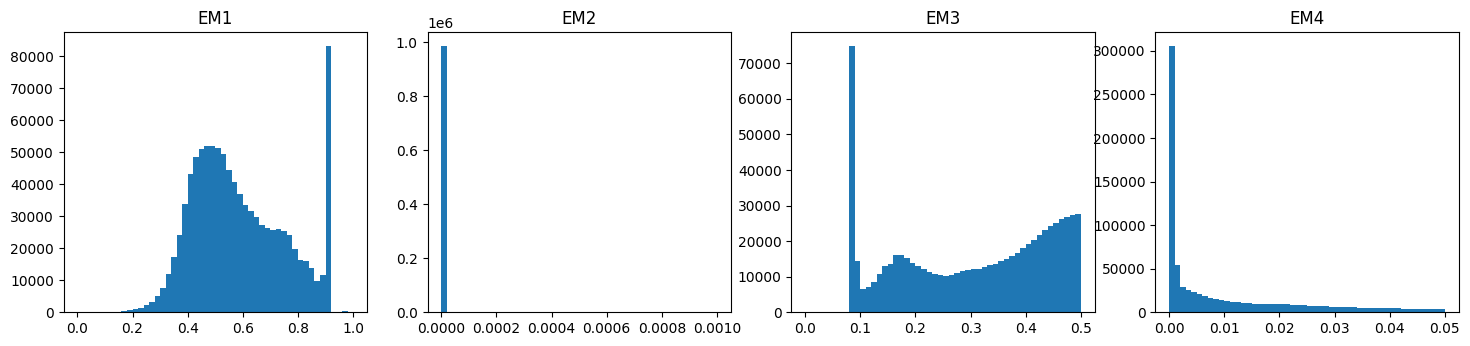

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(2,4,1); plt.title('EM1')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,0]),bins=50,range=[0,1.0])

ax2 = fig.add_subplot(2,4,2); plt.title('EM2')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,1]),bins=50,range=[0,0.001])

ax3 = fig.add_subplot(2,4,3); plt.title('EM3')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,2]),bins=50,range=[0,0.5])

ax4 = fig.add_subplot(2,4,4); plt.title('EM4')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,3]),bins=50,range=[0,0.05])

![ ](https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/py-figs/classification_endmember_extraction_py/output_36_0.png)


Below we define a function to compute and display Spectral Information Diverngence (SID):

In [ ]:
cls.SID?

In [ ]:
def SID(data,E,thrs=None):
    sid = cls.SID()
    cmap = sid.classify(data,E,threshold=thrs)
    sid.display(colorMap='tab20b',suffix='SERC')

Now we can call this function using the three endmembers (classes) that contain the most information:

In [ ]:
U2 = U[[0,2,3],:]
SID(data_clean, U2, [0.8,0.3,0.03])

AttributeError: ignored

![ ](https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/py-figs/classification_endmember_extraction_py/output_40_0.png)


From this map we can see that SID did a pretty good job of identifying the water (dark blue), roads/buildings (orange), and vegetation (blue). We can compare it to the <a href="https://viewer.nationalmap.gov/" target="_blank">USA Topo Base map</a>.

 <figure>
	<a href="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/hyperspectral-general/SERC_368000_4307000_UStopo.png">
	<img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/hyperspectral-general/SERC_368000_4307000_UStopo.png" width="300" height="300"></a>
	<figcaption> The NEON SJER field site. Source: National Ecological Observatory Network (NEON)
	</figcaption>
</figure>

## Challenges

1. On your own, try the Spectral Angle Mapper. If you aren't sure where to start, refer to
<a href="https://pysptools.sourceforge.io/classification.html#spectral-angle-mapper-sam" target="_blank">PySpTools SAM documentation</a>
and the
<a href="https://pysptools.sourceforge.io/examples_front.html#examples-using-the-ipython-notebook" target="_blank">Pine Creek example 1</a>.

**Hint**: use the SAM function below, and refer to the SID syntax used above.

In [ ]:
def SAM(data,E,thrs=None):
    sam = cls.SAM()
    cmap = sam.classify(data,E,threshold=thrs)
    sam.display(colorMap='Paired')

2. Experiment with different settings with SID and SAM (e.g., adjust the # of endmembers, thresholds, etc.)

3. Determine which algorithm (SID, SAM) you think does a better job classifying the SERC data tile. Synthesize your results in a markdown cell.

4. Take a subset of the bands before running endmember extraction. How different is the classification if you use only half the data points? How much faster does the algorithm run? When running analysis on large data sets, it is useful to

**Hints**:

* To extract every 10th element from the array `A`, use `A[0::10]`
* Import the package `time` to track the amount of time it takes to run a script.

In [ ]:
#start_time = time.time()
# code
#elapsed_time = time.time() - start_time

## What Next?

`PySpTools` has an alpha interface with the Python machine learning package `scikit-learn`. To apply more advanced machine learning techniques, you may wish to explore some of these algorithms.  

* <a href="https://pysptools.sourceforge.io/skl.html" target="_blank">Scikit-learn documentation on SourceForge</a>.
* <a href="http://scikit-learn.org/stable/" target="_blank">Scikit-learn website</a>.

In [ ]:
!wget https://sourceforge.net/projects/pysptools/files/data/data.tar.gz

In [ ]:
!tar xvf /content/data.tar.gz -O

In [ ]:
from __future__ import print_function

%matplotlib inline

import os
import os.path as osp
import numpy as np

import pysptools.util as util
import pysptools.eea as eea
import pysptools.abundance_maps as amp
import pysptools.classification as cls
import pysptools.material_count as cnt

def remove_bands(M):
    """
    Remove the bands with atmospheric
    scattering.
    Remove:
        [0..4]
        [102..110]
        [148..169]
        [211..end]
    """
    p1 = list(range(5,102))
    p2 = list(range(111,148))
    p3 = list(range(170,211))
    Mp = M[:,:,p1+p2+p3]
    return Mp

data_path = '/content' #os.environ['PYSPTOOLS_DATA']

sample = '92AV3C.hdr'

data_file = osp.join(data_path, sample)
data, header = util.load_ENVI_file(data_file)

# Remove some bands
data_clean = remove_bands(data)
# ajust the number of bands
header['wavelength'] = range(1, data_clean.shape[2]+1)

# Display a linear stretched RGB image of the Pine Creek cube
#util.display_linear_stretch(data, 98, 86, 22)
util.display_linear_stretch(data, 169, 83, 45)